Question 1.Load the dataframe and ensure data quality by checking for missing values and duplicate rows.
 Handle missing values and remove duplicate rows if necessary.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#  reading the data
df = pd.read_csv("spotify.csv")

In [4]:
df.head()

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


In [5]:
df.shape

(440, 5)

In [6]:
# check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB


In [7]:
df.isnull().sum()

,0
Artist,0
Track Name,0
Popularity,0
Duration (ms),0
Track ID,0


In [8]:
# Check for duplicated rows
df.duplicated().sum()

27

In [10]:
# remove duplicate and keep only one

df.drop_duplicates(keep='first', inplace=True)
df.shape

(413, 5)

# **EDA**

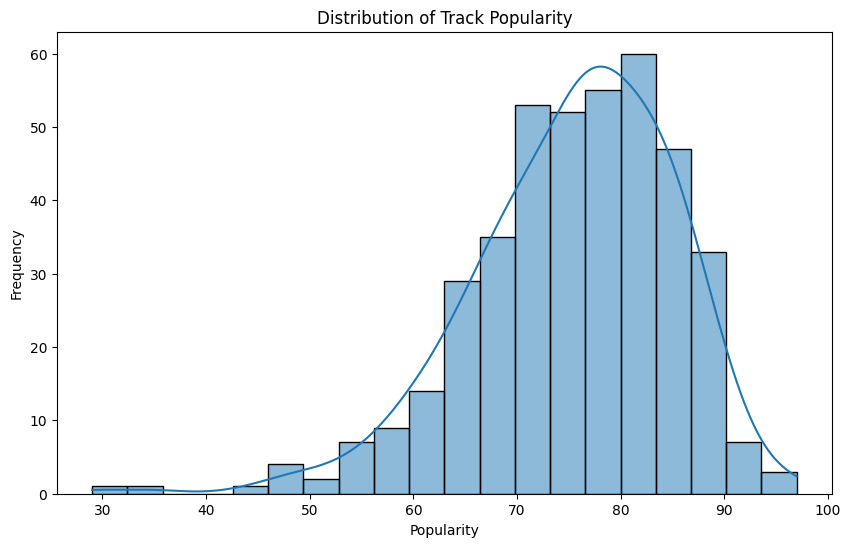

In [12]:
# Question: 2.What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.

plt.figure(figsize=(10, 6))
sns.histplot(df['Popularity'], bins=20, kde=True)
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()


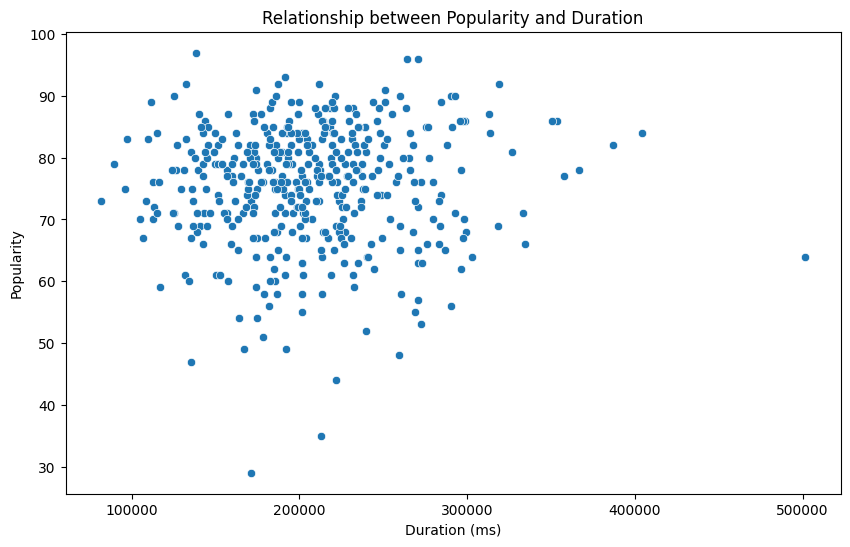

In [14]:
# Question: 3.Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration (ms)', y='Popularity', data=df)
plt.title('Relationship between Popularity and Duration')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.show()


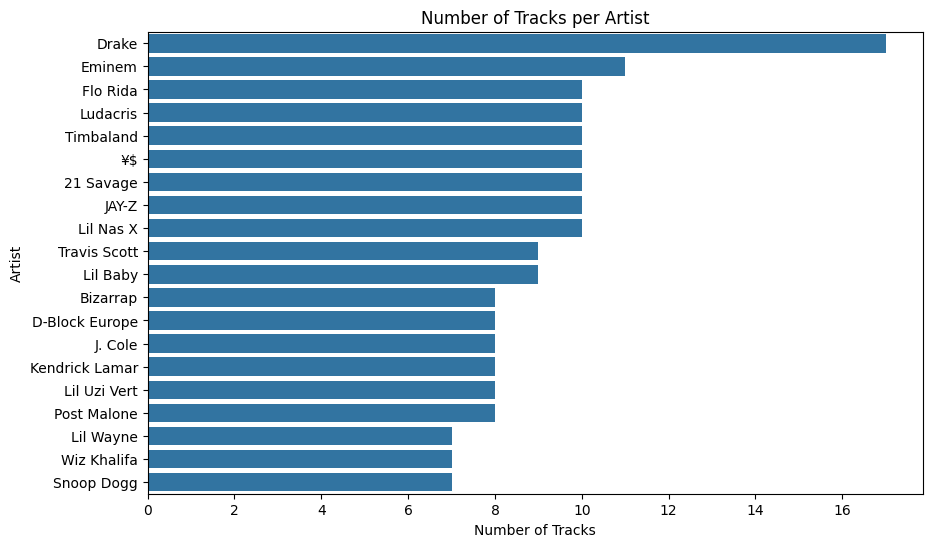

The artist with the highest number of tracks is: Drake


In [15]:
# Question: 4.Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist
# using a countplot.

# Count tracks for each artist
artist_counts = df['Artist'].value_counts()

# Display the count of tracks for each artist using a countplot
plt.figure(figsize=(10, 6))
sns.countplot(y='Artist', data=df, order=df['Artist'].value_counts().index[:20])
plt.title('Number of Tracks per Artist')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.show()

# Find the artist with the highest number of tracks
top_artist = artist_counts.index[0]
print(f"The artist with the highest number of tracks is: {top_artist}")


In [16]:
# Question: 5.What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.

# Sort the DataFrame by popularity in ascending order
least_popular_tracks = df.sort_values(by='Popularity', ascending=True).head(5)

# Display the artist name and track name for the top 5 least popular tracks
print(least_popular_tracks[['Artist', 'Track Name']])


             Artist                     Track Name
207          Pressa  Attachments (feat. Coi Leray)
231   Justin Bieber                     Intentions
413  French Montana                Splash Brothers
225        Lil Baby                  On Me - Remix
407     Wyclef Jean      911 (feat. Mary J. Blige)


In [17]:
# Question: 6.Among the top 5 most popular artists, which artist has the highest popularity on average?
#  Calculate and display the average popularity for each artist.

# Get the top 5 most popular artists
top_5_artists = df['Artist'].value_counts().index[:5]

# Filter the DataFrame to include only the top 5 artists
top_5_artists_df = df[df['Artist'].isin(top_5_artists)]

# Calculate the average popularity for each artist
average_popularity = top_5_artists_df.groupby('Artist')['Popularity'].mean()

# Display the average popularity for each artist
print(average_popularity)

# Find the artist with the highest average popularity
highest_avg_popularity_artist = average_popularity.idxmax()
print(f"\nThe artist with the highest average popularity among the top 5 is: {highest_avg_popularity_artist}")


Artist
Drake        82.882353
Eminem       83.636364
Flo Rida     78.000000
Ludacris     63.000000
Timbaland    69.000000
Name: Popularity, dtype: float64

The artist with the highest average popularity among the top 5 is: Eminem


In [18]:
# Question: 7.For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.

# Get the top 5 most popular artists
top_5_artists = df['Artist'].value_counts().index[:5]

# Create an empty dictionary to store the most popular track for each artist
most_popular_tracks = {}

# Iterate over the top 5 artists
for artist in top_5_artists:
    # Filter the DataFrame to include only the current artist's tracks
    artist_df = df[df['Artist'] == artist]

    # Find the most popular track for the current artist
    most_popular_track = artist_df.loc[artist_df['Popularity'].idxmax()]

    # Store the most popular track name in the dictionary
    most_popular_tracks[artist] = most_popular_track['Track Name']

# Print the most popular track for each artist
for artist, track_name in most_popular_tracks.items():
    print(f"Artist: {artist}, Most Popular Track: {track_name}")


Artist: Drake, Most Popular Track: Rich Baby Daddy (feat. Sexyy Red & SZA)
Artist: Eminem, Most Popular Track: Without Me
Artist: Flo Rida, Most Popular Track: Low (feat. T-Pain)
Artist: Ludacris, Most Popular Track: My Chick Bad
Artist: Timbaland, Most Popular Track: The Way I Are


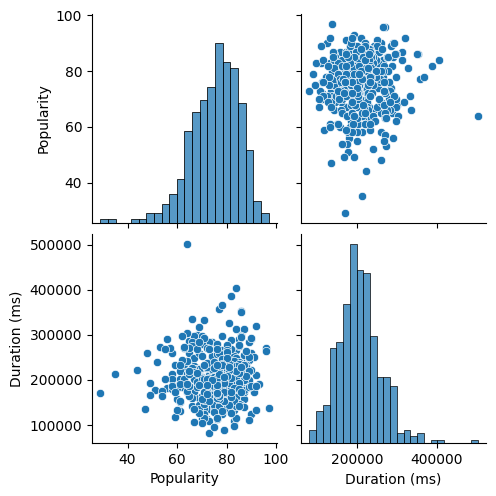

In [20]:
# question: 8.Visualize relationships between multiple numerical variables simultaneously using a pair plot.

sns.pairplot(df)
plt.show()


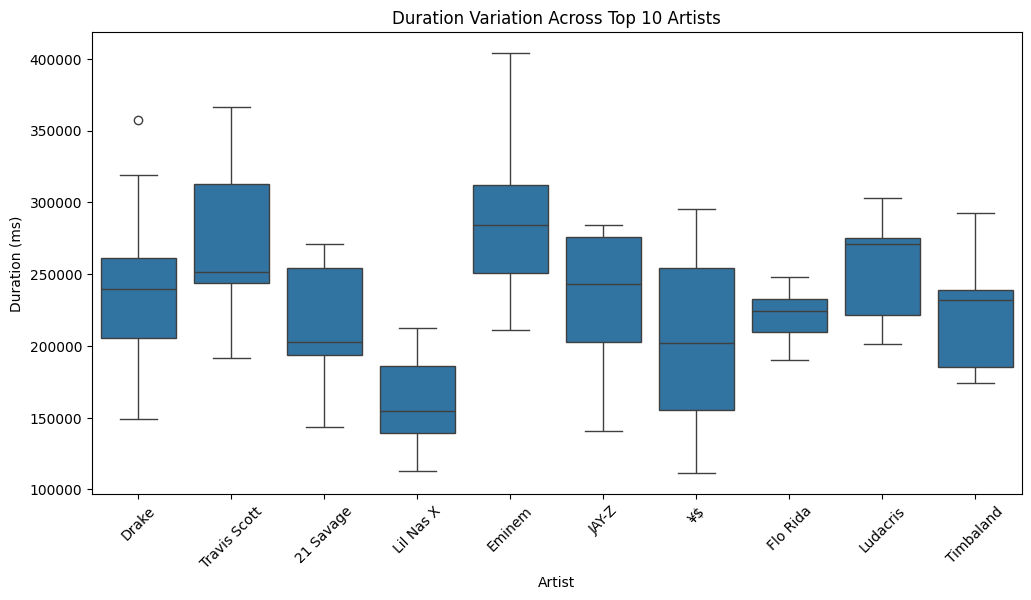

In [21]:
# Question: 9.Does the duration of tracks vary significantly across different artists?
# Explore this visually using a box plot or violin plot.

plt.figure(figsize=(12, 6))
sns.boxplot(x='Artist', y='Duration (ms)', data=df[df['Artist'].isin(df['Artist'].value_counts().nlargest(10).index)])
plt.title('Duration Variation Across Top 10 Artists')
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.xticks(rotation=45)
plt.show()


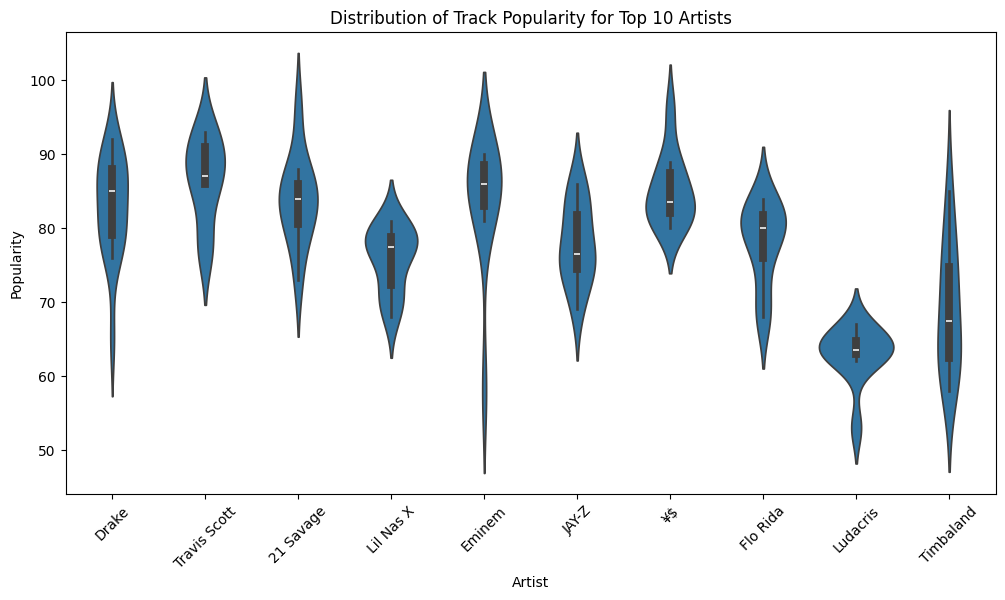

In [22]:
# Question: 10.How does the distribution of track popularity vary for different artists?
# Visualize this using a swarm plot or a violin plot.

plt.figure(figsize=(12, 6))
sns.violinplot(x='Artist', y='Popularity', data=df[df['Artist'].isin(df['Artist'].value_counts().nlargest(10).index)])
plt.title('Distribution of Track Popularity for Top 10 Artists')
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.xticks(rotation=45)
plt.show()
